In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Loading data
df = pd.read_csv('Data\\balanced_augmented_Call_Conversation(603).csv')
print(df.shape)

(602, 4)


In [32]:
df.head(5)

,VoiceClip_No,TextTranscript,label,processed_content
0,Voice52,the experience was your agent responded positi...,Non,the experience was your agent responded positi...
1,Voice38,get not working all,Non,get not working all
2,Voice199,can know the current price the fiber connection,Non,can know the current price the fiber connection
3,Voice216,problem with can you help,Non,problem with can you help
4,Voice62,problem with can you help,Non,problem with can you help


In [33]:
x = df['TextTranscript']
y = df['label']

# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=24)


svm_classifier = SVC()#random_state=42)


# Hyperparameter grid to search
param_grid = {
    'C': [1],
    'kernel': ['linear'],
    }

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
#using GridSearchCV to perform a grid search for the best hyperparameters within the specified parameter grid.


# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training the final model with the best hyperparameters on the full training dataset
final_svm_classifier = SVC(**best_params)# random_state=42)
final_svm_classifier.fit(X_train, y_train)

# Predicting the sentiment on the testing dataset
y_pred_test = final_svm_classifier.predict(X_test)
y_pred_train = final_svm_classifier.predict(X_train)

# Calculating the accuracy for training and testing datasets
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Printing the accuracy with 4 decimal points
print(f"\nTraining Accuracy: {accuracy_train:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")

# Evaluate the final model on the testing dataset
report = classification_report(y_test, y_pred_test)
print("\nClassification Report on Testing Data:")
print(report)

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}

Training Accuracy: 0.9956
Testing Accuracy: 0.9404

Classification Report on Testing Data:
              precision    recall  f1-score   support

         Agg       0.94      0.95      0.94        79
         Non       0.94      0.93      0.94        72

    accuracy                           0.94       151
   macro avg       0.94      0.94      0.94       151
weighted avg       0.94      0.94      0.94       151



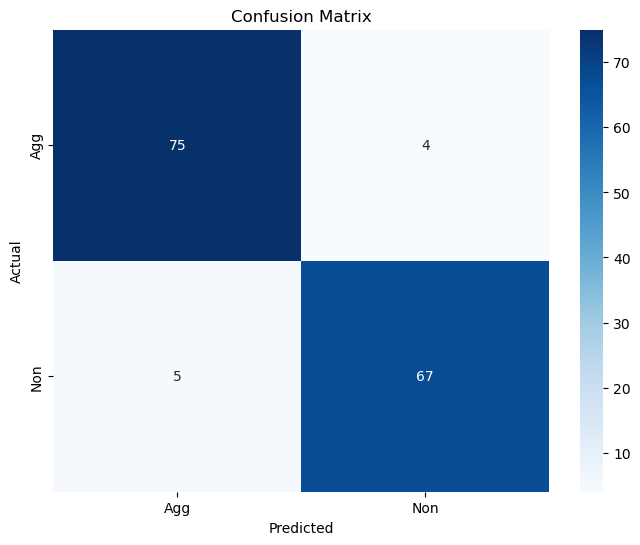

In [37]:
# Calculating the confusion matrix for the testing dataset
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Agg', 'Non'], yticklabels=['Agg', 'Non'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()